In [ ]:
import gdown
import pandas as pd

url = 'https://drive.google.com/file/d/1VUn2WKkKeRXwH02K9bqH98KjPxrUmgXh/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
output = "HousingData.csv"
gdown.download(path, output, quiet=False)
housingData = pd.read_csv("/content/HousingData.csv")

Downloading...
From: https://drive.google.com/uc?export=download&id=1VUn2WKkKeRXwH02K9bqH98KjPxrUmgXh
To: /content/HousingData.csv
100%|██████████| 1.60M/1.60M [00:00<00:00, 74.2MB/s]


In [ ]:
housingData.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609


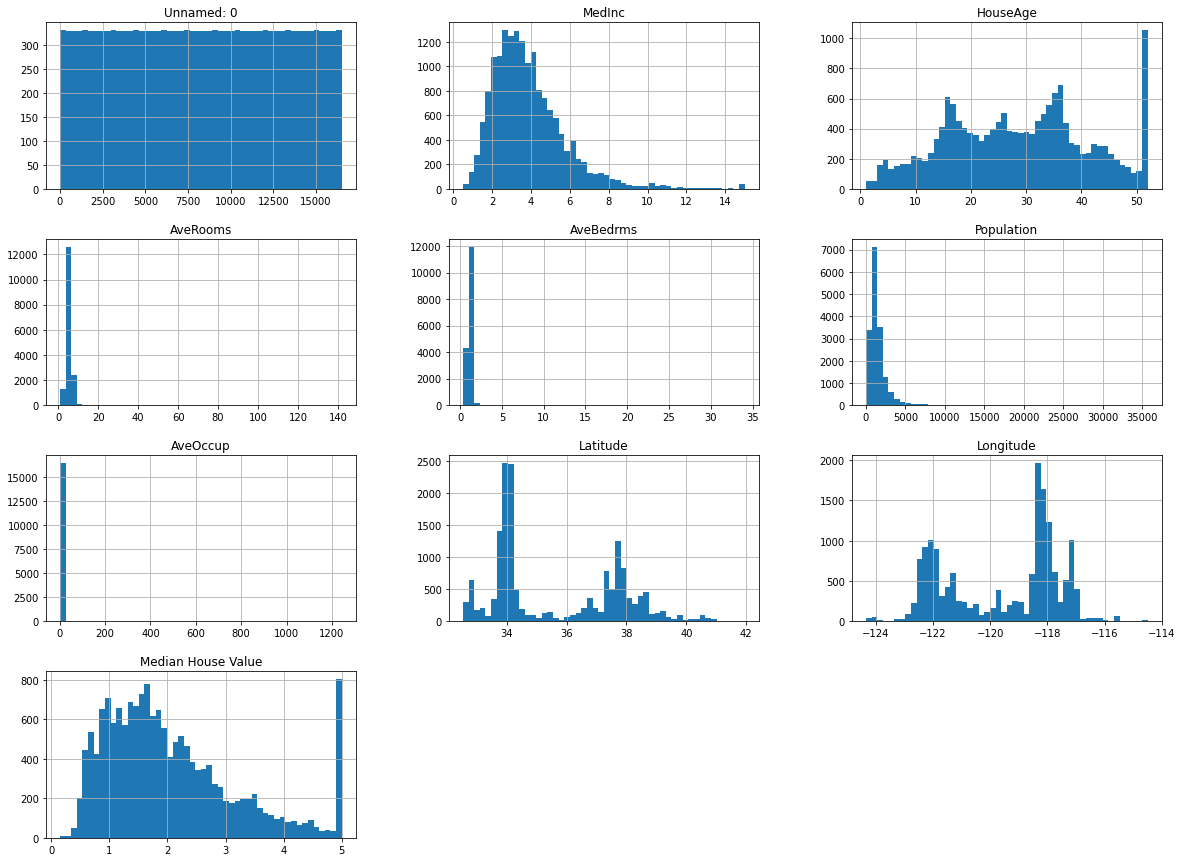

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housingData.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np
housingData["income_cat"] = pd.cut(housingData["MedInc"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

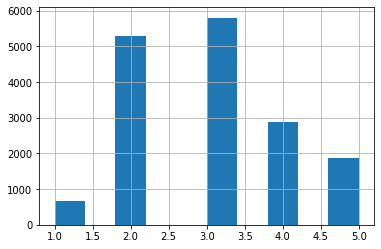

In [ ]:
housingData["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housingData, housingData["income_cat"]):
    strat_train_set = housingData.loc[train_index]
    strat_test_set = housingData.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.351499
2    0.320920
4    0.174690
5    0.112928
1    0.039964
Name: income_cat, dtype: float64

Removing the income_cat attribute 

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
data_train = strat_train_set.copy()


In [ ]:
data_train = strat_train_set.drop("Median House Value", axis=1)
data_train = data_train.drop("Unnamed: 0", axis=1)
data_train_labels = strat_train_set["Median House Value"].copy()


In [ ]:
data_test = strat_test_set.drop("Median House Value", axis=1)
data_test = data_test.drop("Unnamed: 0", axis=1)
data_trest_labels = strat_test_set["Median House Value"].copy()


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(data_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(data_train)

**Gradient Descent Implementation**

In [ ]:
# function to compute predictions created for the current dataset
def predict(X, theta):
  pred = np.dot(X, theta[0:8]) + theta[8]
  return pred

In [ ]:
def gradient(X, y, theta): 
    h = np.dot(X, theta) 
    grad = (2/X.shape[0])*np.dot(X.transpose(), (h - y)) 
    return grad

In [ ]:
def cost(X, y, theta): 
    h = np.dot(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J[0] 

In [ ]:
# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate, steps): 
    X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
    error_list = []  
    for s in range(steps):
      theta = theta - learning_rate * gradient(X, y, theta) 
      error_list.append(cost(X, y, theta)) #useful for plotting changes when using different batch sizes
  
    return theta, error_list

In [ ]:
import numpy as np
ynum = np.array([data_train_labels]).T

In [ ]:
theta_train,error_train = gradientDescent(housing_num_tr, ynum,0.1, 1000)

In [ ]:
prediction = predict(housing_num_tr, theta_train)
prediction

array([[2.09458527],
       [2.22022709],
       [4.91232015],
       ...,
       [1.52546935],
       [2.69467231],
       [2.69006322]])

In [ ]:
def printPlot(error):

  import matplotlib.pyplot as plt 
  from matplotlib.pyplot import figure

  # plot loss function over time
  color='tab:red'
  plt.figure(figsize=(10,4))
  plt.plot(error, label='Loss function', color=color)
  
  
 
  plt.legend(prop={'size': 16})

  plt.legend();

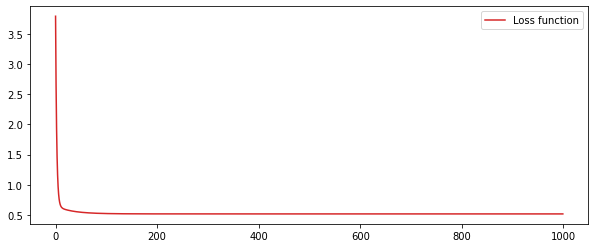

In [ ]:
printPlot( error_train)

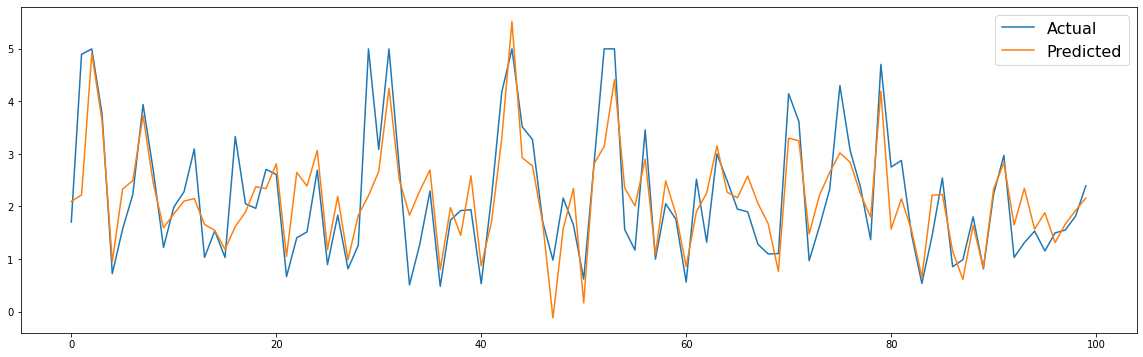

In [ ]:
from matplotlib.pyplot import figure
plt.figure(figsize=(20,6))
plt.plot(data_train_labels.values[:100], label='Actual')
plt.plot(prediction[:100], label='Predicted')
plt.legend(prop={'size': 16})
plt.show()

**Mini Batch Gradient Descent Implementation**

In [ ]:
def hypothesis(X, theta): 
    return np.dot(X, theta) 

In [ ]:
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches

In [ ]:
# function to perform mini-batch gradient descent 
def miniBatchDescent(X, y, learning_rate , batch_size): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

In [ ]:
theta_mini, error_mini = miniBatchDescent(housing_num_tr, ynum, 0.001, 32)

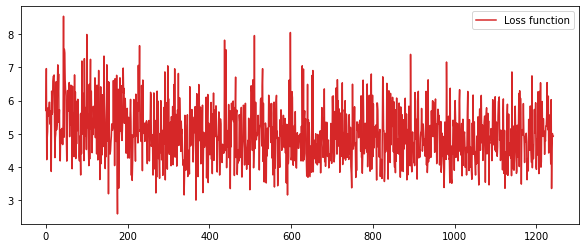

In [ ]:
printPlot( error_mini)

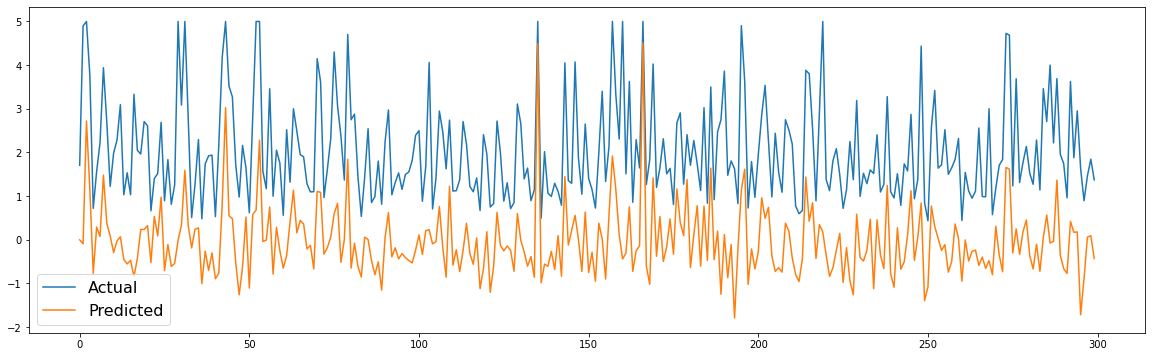

In [ ]:
y_pred = hypothesis(housing_num_tr, theta_mini) 

from matplotlib.pyplot import figure
plt.figure(figsize=(20,6))
plt.plot(data_train_labels.values[:300], label='Actual')
plt.plot(y_pred[:300], label='Predicted')
plt.legend(prop={'size': 16})
plt.show()

**Stochastic Gradient Descent Implemenation**

In [ ]:
def learningSchedule(t,t0=5,t1=50):
    return t0 / (t+t1)

def sgdGradient(xi, yi, theta): 
    h = np.dot(xi, theta) 
    grad = (2*xi.shape[0])*np.dot(xi.transpose(), (h - yi)) 
    return grad  

def sgd(X_b, y, learning_rate = 0.0001, n_epochs = 5 ):
    X_b = np.c_[ X_b, np.ones(X_b.shape[0]) ] #add a column of ones to X for the bias term
    
    error_list = []  
    theta = np.random.rand(X_b.shape[1],1)
    m = X_b.shape[0]
  
    for epoch in range(n_epochs):
      for i in range(m):
        random_index =  np.random.randint(m)
        xi = X_b[random_index: random_index +1]
        yi = y[random_index: random_index +1]
        gradients = sgdGradient(xi,yi,theta)
        learning_rate = learningSchedule(epoch *m + i)
        theta = theta -(learning_rate * gradients)
        error_list.append(cost(xi, yi, theta)) 
  
    return theta, error_list 

In [ ]:
theta_s, error_s = sgd(housing_num_tr, ynum)

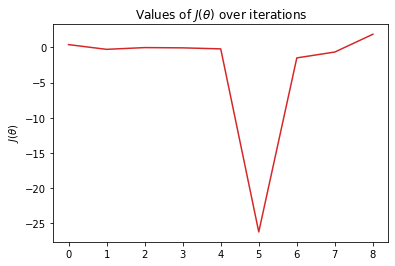

In [ ]:
import matplotlib.pyplot as plt
color='tab:red'

plt.plot(theta_s, label='Loss function', color=color)
plt.title('Values of $J(\\theta)$ over iterations')
plt.ylabel(' $J(\\theta)$')
plt.show()

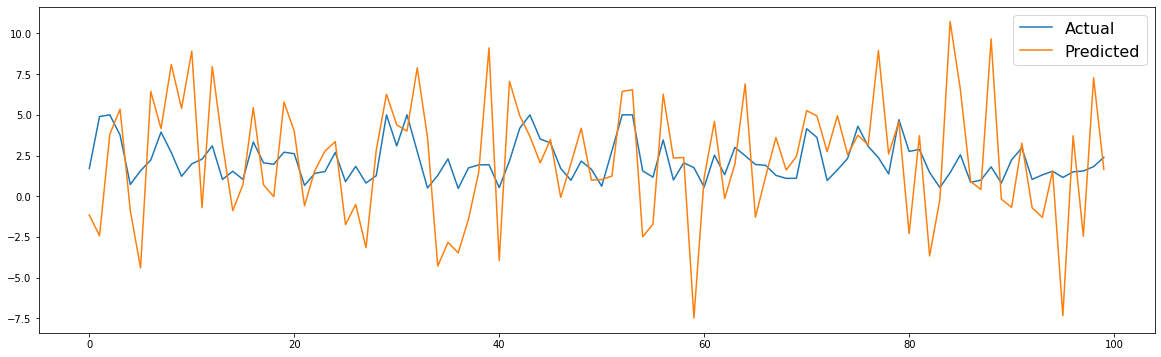

In [ ]:
prediction_h = predict(housing_num_tr, theta_s)

from matplotlib.pyplot import figure
plt.figure(figsize=(20,6))
plt.plot(data_train_labels.values[:100], label='Actual')
plt.plot(prediction_h[:100], label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
